In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras import layers,models,optimizers
from sklearn.metrics import accuracy_score,confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os

In [4]:
X_train=[]
Y_train=[]
image_size=150
labels=['glioma','meningioma','notumor','pituitary']

for i in labels:
          folderPath=os.path.join(r"/content/drive/MyDrive/Brain Tumor/Training",i) #Assigning the folder path and its subfolders.
          for j in os.listdir(folderPath):                   #Opening the subfolders and reading the image.
                  img=cv2.imread(os.path.join(folderPath,j)) #Reading the image inside subfloders.
                  img=cv2.resize(img,(image_size,image_size)) #Resizing the image.
                  X_train.append(img)
                  Y_train.append(i)

for i in labels:
          folderPath=os.path.join(r"/content/drive/MyDrive/Brain Tumor/Testing",i)
          for j in os.listdir(folderPath):
                  img=cv2.imread(os.path.join(folderPath,j))
                  img=cv2.resize(img,(image_size,image_size))
                  X_train.append(img)
                  Y_train.append(i)

In [5]:
label_dict={0:"glioma",1:"meningioma",2:"notumor",3:"pituitary"}

In [6]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [7]:
X_train.shape

(7023, 150, 150, 3)

In [8]:
Y_train.shape

(7023,)

In [9]:
X_train,Y_train=shuffle(X_train,Y_train,random_state=42)

In [10]:
X_train.shape

(7023, 150, 150, 3)

In [11]:
Y_train[10][0]

'n'

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.2,random_state=101)

In [13]:
labels.index('meningioma')

1

In [14]:
y_train_new=[]

for i in y_train:
          y_train_new.append(labels.index(i))

y_train=y_train_new

In [15]:
y_train=pd.DataFrame(y_train)

In [16]:
y_train.shape

(5618, 1)

In [17]:
y_train[0][3]

2

Label 
 Label Id: 2 
 Name: notumor


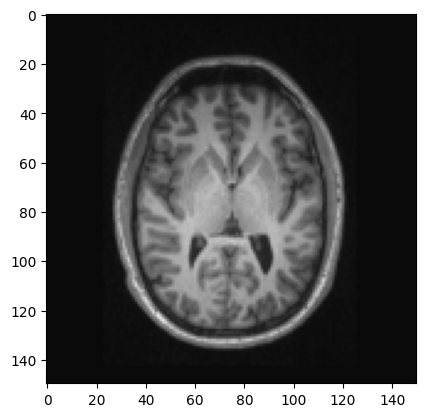

In [18]:
i=20
image=X_train[i]
label=y_train[0][i]
print(f'Label \n Label Id: {label} \n Name: {label_dict[label]}')
plt.imshow(image);


In [19]:
y_train=tf.keras.utils.to_categorical(y_train)

In [20]:
y_train

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [21]:
y_test

array(['pituitary', 'notumor', 'notumor', ..., 'meningioma', 'notumor',
       'glioma'], dtype='<U10')

In [22]:
y_test_new=[]

for i in y_test:
          y_test_new.append(labels.index(i))

y_test=y_test_new

In [23]:
y_test=tf.keras.utils.to_categorical(y_test)

In [24]:
y_test

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [25]:
x_train.shape

(5618, 150, 150, 3)

In [26]:
Input_dim=x_train.shape[1:]

In [27]:
Input_dim

(150, 150, 3)

Creating the CNN model.

In [28]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=Input_dim))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(4,activation='softmax'))



In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 128)       7

In [30]:
#opt=optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08)

In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [32]:
x_train=x_train.astype('float32')
x_train/=255.0
x_test=x_test.astype('float32')
x_test/=255.0

In [33]:
early_stopping=EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=30)
model_checkpoint=ModelCheckpoint("Tumor_Prediction_{epoch:02d}_loss{val_loss:.4f}.h5",
                                 monitor='val_loss',
                                 verbose=1,
                                 save_best_only=True,
                                 mode='auto',
                                 period=1)

In [34]:
x_train=x_train.reshape(x_train.shape[0],150,150,3)
x_test=x_test.reshape(x_test.shape[0],150,150,3)

print(x_train.shape)
print(x_test.shape)

(5618, 150, 150, 3)
(1405, 150, 150, 3)


Epoch 1/50
176/176 [==============================] - ETA: 0s - loss: 0.9630 - accuracy: 0.5730
Epoch 1: val_loss improved from inf to 0.65016, saving model to Tumor_Prediction_01_loss0.6502.h5
176/176 [==============================] - 31s 120ms/step - loss: 0.9630 - accuracy: 0.5730 - val_loss: 0.6502 - val_accuracy: 0.7174
Epoch 2/50
  1/176 [..............................] - ETA: 13s - loss: 0.7324 - accuracy: 0.7188

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


176/176 [==============================] - ETA: 0s - loss: 0.6083 - accuracy: 0.7433
Epoch 2: val_loss improved from 0.65016 to 0.47262, saving model to Tumor_Prediction_02_loss0.4726.h5
176/176 [==============================] - 16s 89ms/step - loss: 0.6083 - accuracy: 0.7433 - val_loss: 0.4726 - val_accuracy: 0.8214
Epoch 3/50
176/176 [==============================] - ETA: 0s - loss: 0.4947 - accuracy: 0.7989
Epoch 3: val_loss improved from 0.47262 to 0.36653, saving model to Tumor_Prediction_03_loss0.3665.h5
176/176 [==============================] - 16s 90ms/step - loss: 0.4947 - accuracy: 0.7989 - val_loss: 0.3665 - val_accuracy: 0.8598
Epoch 4/50
176/176 [==============================] - ETA: 0s - loss: 0.4204 - accuracy: 0.8311
Epoch 4: val_loss did not improve from 0.36653
176/176 [==============================] - 16s 92ms/step - loss: 0.4204 - accuracy: 0.8311 - val_loss: 0.4056 - val_accuracy: 0.8199
Epoch 5/50
176/176 [==============================] - ETA: 0s - loss: 0.3

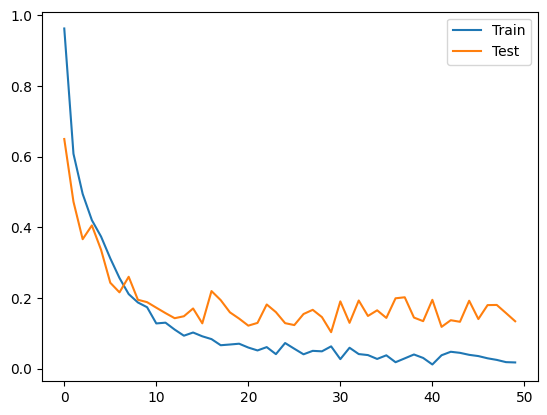

In [35]:
history=model.fit(x_train,y_train,
                  epochs=50,
                  validation_data=(x_test,y_test),
                  shuffle=True,
                  verbose=1,
                  callbacks=[early_stopping,model_checkpoint])


plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label="Test")
plt.legend()
plt.show()



In [36]:
scores=model.evaluate(x_test,y_test,verbose=1)
print("Test losss: ",scores[0])
print("Test accuracy: ",scores[1])

44/44 [==============================] - 1s 22ms/step - loss: 0.1342 - accuracy: 0.9751
Test losss:  0.13424448668956757
Test accuracy:  0.9750889539718628


In [37]:
predictions=model.predict(x_test)

44/44 [==============================] - 1s 17ms/step


In [38]:
predictions[1]

array([2.56064333e-29, 3.33002235e-17, 1.00000000e+00, 1.15647206e-23],
      dtype=float32)

In [39]:
np.argmax(predictions[1])

2

In [40]:
y_test[1]

array([0., 0., 1., 0.], dtype=float32)

In [41]:
label_dict[2]

'notumor'

In [42]:
from keras.models import load_model

In [43]:
best_model=load_model("/content/Tumor_Prediction_30_loss0.1033.h5")

In [44]:
scores=best_model.evaluate(x_test,y_test,verbose=1)
print("Test losss: ",scores[0])
print("Test accuracy: ",scores[1])

44/44 [==============================] - 1s 22ms/step - loss: 0.1033 - accuracy: 0.9730
Test losss:  0.10331721603870392
Test accuracy:  0.972953736782074


In [46]:
pip install tf2onnx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.7/455.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 32.1 MB/s eta 0:00:00


In [47]:
import tensorflow as tf
import tf2onnx

In [48]:
model=tf.keras.models.load_model("/content/Tumor_Prediction_30_loss0.1033.h5")

In [50]:
onnx_model, _=tf2onnx.convert.from_keras(model)

In [51]:
# with open('Brain Tumor Predictor.onnx','wb') as file:
#   file.write(onnx_model.SerializeToString())